<a href="https://colab.research.google.com/github/jarif87/LeNet-Implementation/blob/main/LeNet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from zipfile import ZipFile
# with ZipFile("/content/drive/Shareddrives/jarif/dogs_vs_cats_second_dataset/dogs_vs_cats.zip","r") as zipObj:
#   zipObj.extractall("/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats")


In [3]:
import numpy as np
import tensorflow as tf
import glob
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


###Neural_Network


In [4]:

from tensorflow.keras.layers import Conv2D,Dense,AveragePooling2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential,load_model


##Visualization


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import cv2
import os

In [7]:
test_image_path="/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats/train/train"

In [8]:
check_items=os.listdir(test_image_path)

In [9]:
np.unique(check_items)

array(['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', ..., 'dog.9997.jpg',
       'dog.9998.jpg', 'dog.9999.jpg'], dtype='<U13')

In [10]:
check_items.index("dog.9997.jpg")

997

In [11]:
check_items[997]

'dog.9997.jpg'

In [12]:
image_width=28
image_height=28

In [13]:
def imagefeatureextract(image,size=(28,28)):
  img=cv2.resize(image,size)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray=np.expand_dims(gray,2)
  return gray



In [14]:
# test_image_one="/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats/train/train/cat.0.jpg"

In [15]:
#imagefeatureextract(test_image_one)

In [16]:
test_image_path="/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats/train/train/"

In [17]:
dataset_path=os.path.join(test_image_path,"*g")
file_read=glob.glob(dataset_path)

In [18]:
#"/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats/train/train/cat.0.jpg".split("/")

In [19]:
# cv2.imread("/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats/train/train/cat.0.jpg")

In [20]:
data=[]
category=[]
for(i,file) in enumerate(file_read):
  image=cv2.imread(file)
  feature=imagefeatureextract(image)
  data.append(feature)
  classnames=file.split(os.path.sep)[-1].split(".")[0]
  category.append(classnames)
 
 

   

In [21]:
data =np.array(data,dtype=np.uint8)
labels=np.array(category)

In [22]:
data.shape

(25000, 28, 28, 1)

In [23]:
np.unique(category)

array(['cat', 'dog'], dtype='<U3')

In [24]:
len(data)

25000

In [25]:
len(category)

25000

####Label Encoder

In [26]:
labels=np.array(category)

In [27]:
label_encoder=preprocessing.LabelEncoder()
#label_encoder=LabelEncoder()

In [28]:
classnames=label_encoder.fit_transform(labels)

In [29]:
np.unique(classnames)

array([0, 1])

In [30]:
classnames.shape

(25000,)

In [31]:
classnames[0]

1

####ONE_HOT_ENCODING

In [32]:
onehotencoder=OneHotEncoder(sparse=False)
label_Encoder_value=classnames.reshape(len(classnames),1)
oneHotEncoder_Values=onehotencoder.fit_transform(label_Encoder_value)

In [33]:
oneHotEncoder_Values

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(data,oneHotEncoder_Values,test_size=0.2,random_state=42)

In [35]:
model=Sequential()

#1st_layer
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation="tanh",input_shape=(28,28,1),padding="same"))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))

#2nd_layer
model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),activation="tanh",padding="valid"))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))


model.add(Flatten())

model.add(Dense(120,activation="tanh"))
model.add(Dense(84,activation="tanh"))
model.add(Dense(2,activation="softmax"))




In [36]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [38]:
history=model.fit(X_train,Y_train,epochs=1,validation_data=(X_test,Y_test),verbose=1)

625/625 [==============================] - 16s 25ms/step - loss: 0.6671 - accuracy: 0.5946 - val_loss: 0.6242 - val_accuracy: 0.6474


In [39]:
import datetime
logsdata="logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks=tf.keras.callbacks.TensorBoard(log_dir=logsdata,histogram_freq=1)

In [40]:
model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),callbacks=[callbacks],verbose=1)

Epoch 1/10
625/625 [==============================] - 14s 23ms/step - loss: 0.6243 - accuracy: 0.6521 - val_loss: 0.5996 - val_accuracy: 0.6806
Epoch 2/10
625/625 [==============================] - 14s 23ms/step - loss: 0.5968 - accuracy: 0.6790 - val_loss: 0.6183 - val_accuracy: 0.6566
Epoch 3/10
625/625 [==============================] - 16s 25ms/step - loss: 0.5824 - accuracy: 0.6886 - val_loss: 0.5952 - val_accuracy: 0.6854
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.5609 - accuracy: 0.7119 - val_loss: 0.5675 - val_accuracy: 0.7066
Epoch 5/10
625/625 [==============================] - 16s 25ms/step - loss: 0.5436 - accuracy: 0.7199 - val_loss: 0.5717 - val_accuracy: 0.7078
Epoch 6/10
625/625 [==============================] - 16s 25ms/step - loss: 0.5249 - accuracy: 0.7337 - val_loss: 0.5768 - val_accuracy: 0.7008
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.5097 - accuracy: 0.7463 - val_loss: 0.5810 - val_accuracy:

In [41]:
# %load_ext tensorboard

In [42]:
# %tensorboard --logdir logs/fit

In [43]:
class_data=["cat","dog"]

In [44]:
# test_image_data=cv2.imread("/content/drive/Shareddrives/jarif/Dataset_Dogs_And_Cats/test/test/10.jpg")
# test_image_data=cv2.imread("/content/istockphoto-1306406393-170667a.jpg")
test_image_data=cv2.imread("/content/pexels-evg-kowalievska-1170986.jpg")


In [45]:
image_feature=imagefeatureextract(test_image_data)/255.0
image_feature=np.array([image_feature])

In [46]:
image_feature.shape

(1, 28, 28, 1)

In [47]:
predict=model.predict(image_feature)[0]

In [48]:
probability=model.predict(image_feature)

In [49]:
maximum_probability=predict.argmax(axis=0)

In [50]:
maximum_probability

0

In [51]:
imagedatalabels="{}: {:.2f}%".format(class_data[maximum_probability],predict[maximum_probability]*100)

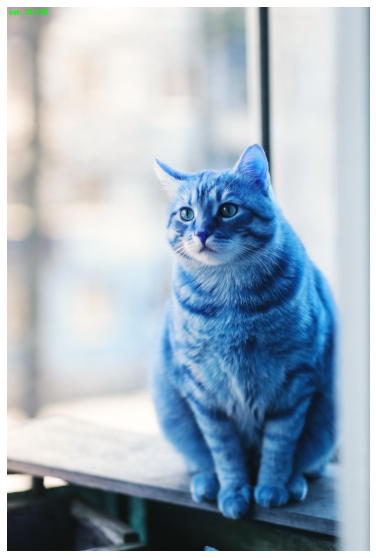

In [52]:

plt.figure(figsize=(10,10))
cv2.putText(test_image_data,imagedatalabels,(10,35),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,255,0),3)
plt.imshow(test_image_data,cmap="gray")
plt.axis("off")
plt.show()